In [5]:
import torch
from torch import nn

import torchvision
import torchvision.transforms.v2 as transforms

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [6]:
transform = transforms.Compose([
    transforms.ToTensor()  # Converts images to PyTorch tensors
])

# Load the CelebA dataset
dataset_landmarks = torchvision.datasets.CelebA(
    root='./data',
    split='train',
    target_type=['bbox', 'landmarks'],
    transform=transform,
    download=False
)
# Load the CelebA dataset
dataset_bbox = torchvision.datasets.CelebA(
    root='./data_bbox',
    split='train',
    target_type=['bbox', 'landmarks'],
    transform=transform,
    download=False
)

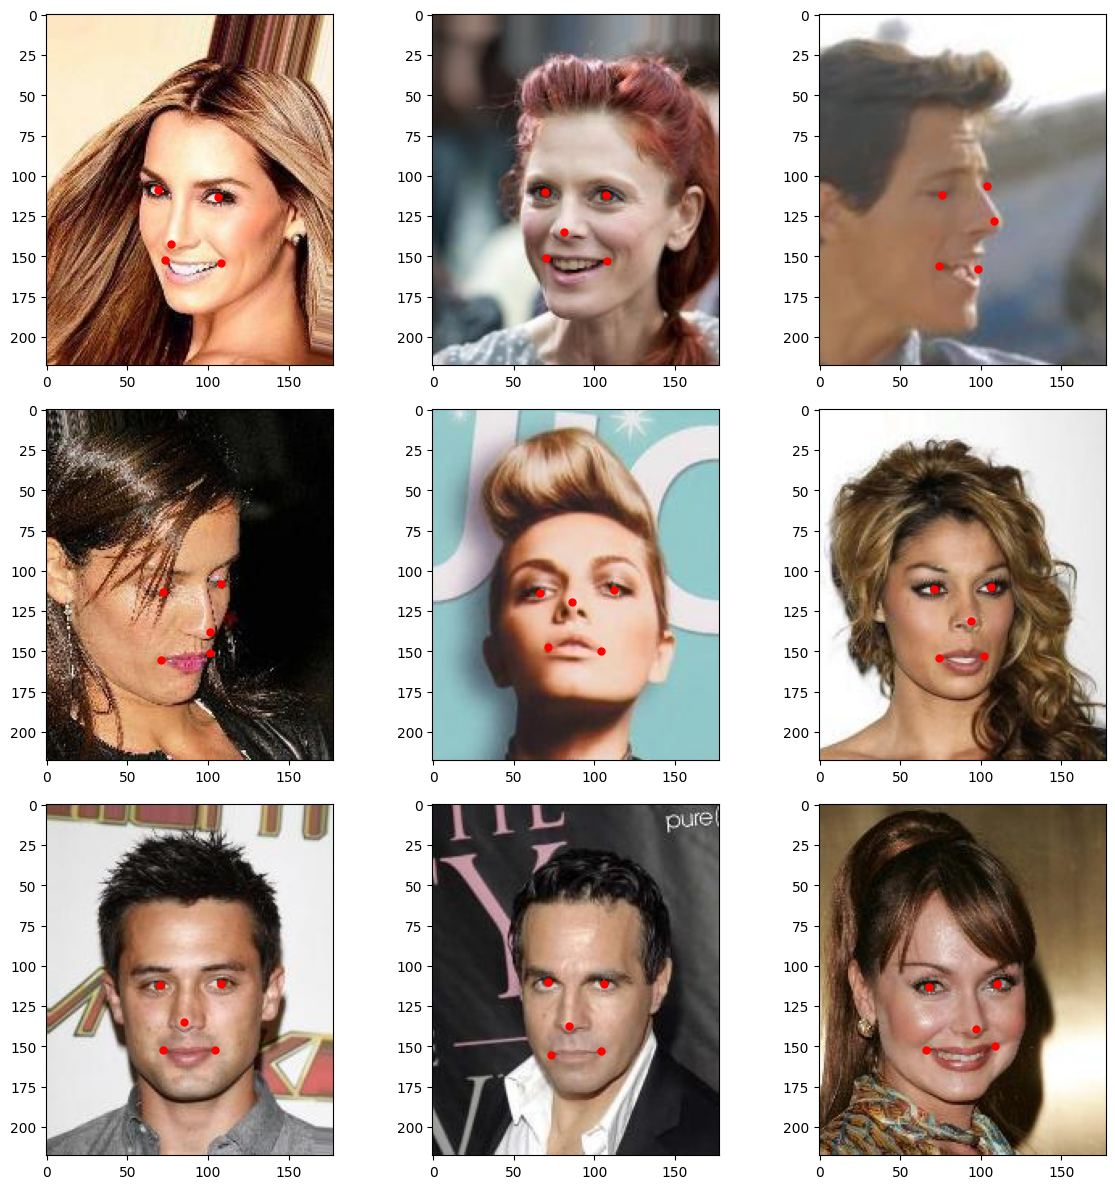

In [9]:
# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    img, (_, landmarks) = dataset_landmarks[i]
    landmarks = landmarks.reshape(5, 2).tolist()

    # Convert tensor to numpy image for plotting
    img_np = img.permute(1, 2, 0).numpy()

    # Display the image
    ax.imshow(img_np)

    # Plot landmarks as green dots
    for (lx, ly) in landmarks:
        ax.plot(lx, ly, 'ro', markersize=5)

    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

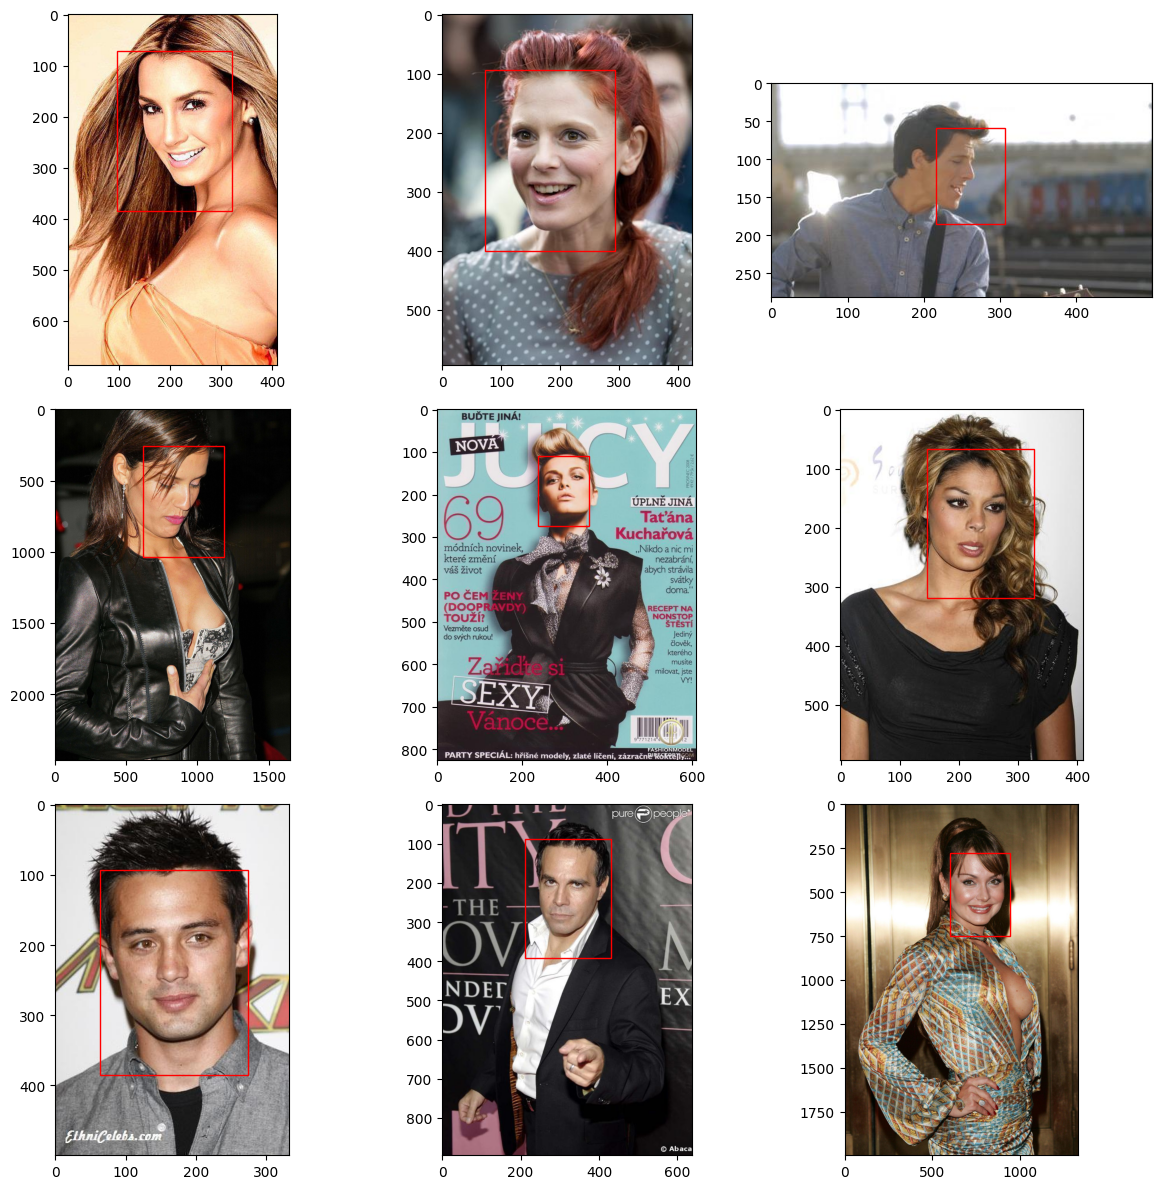

In [10]:
# Create a 3x3 grid for plotting
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    img, (bbox, _) = dataset_bbox[i]
    bbox = bbox.tolist()

    # Convert tensor to numpy image for plotting
    img_np = img.permute(1, 2, 0).numpy()

    # Display the image
    ax.imshow(img_np)

    # Draw bounding box
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    #ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()